In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Load data and Preview
data = pd.read_csv('dataset/dataset_processed.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,7/1/2008,0,8.8,15.7,5.000000,1.600000,2.6,7,48.0,12,...,67.0,1017.4,1017.7,4.587158,4.596907,13.5,14.9,1,0.8,0
1,7/2/2008,0,12.7,15.8,0.800000,1.400000,7.8,12,35.0,11,...,52.0,1022.4,1022.6,4.587158,4.596907,13.7,15.5,0,0.0,0
2,7/3/2008,0,6.2,15.1,0.000000,1.800000,2.1,13,20.0,5,...,56.0,1027.8,1026.5,4.587158,4.596907,9.3,13.9,0,0.0,0
3,7/4/2008,0,5.3,15.9,0.000000,1.400000,8.0,5,30.0,5,...,46.0,1028.7,1025.6,4.587158,4.596907,10.2,15.3,0,0.0,0
4,7/6/2008,0,11.3,15.7,1.572185,5.824924,1.5,6,52.0,5,...,62.0,1019.5,1016.2,4.587158,4.596907,13.0,14.4,0,16.2,1


In [3]:
#Select X, y variables

features = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','RainToday','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

y = data['RainTomorrow']
X = data[features]
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,8.8,15.7,5.000000,1.600000,2.6,1,7,48.0,12,13,92.0,67.0,1017.4,1017.7,4.587158,4.596907,13.5,14.9
1,12.7,15.8,0.800000,1.400000,7.8,0,12,35.0,11,12,75.0,52.0,1022.4,1022.6,4.587158,4.596907,13.7,15.5
2,6.2,15.1,0.000000,1.800000,2.1,0,13,20.0,5,12,81.0,56.0,1027.8,1026.5,4.587158,4.596907,9.3,13.9
3,5.3,15.9,0.000000,1.400000,8.0,0,5,30.0,5,4,71.0,46.0,1028.7,1025.6,4.587158,4.596907,10.2,15.3
4,11.3,15.7,1.572185,5.824924,1.5,0,6,52.0,5,6,62.0,62.0,1019.5,1016.2,4.587158,4.596907,13.0,14.4


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80250866 0.80550016 0.79757531 0.80366327 0.80333806]
0.8025170918238376


In [50]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

KeyboardInterrupt: 

In [57]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78361499 0.78818096 0.77805185 0.7847696  0.784076  ]
0.7837386803400707


In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [6]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85205206 0.85630314 0.84974284 0.85451874 0.85078465]
0.85268028534327


In [21]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85094993 0.85688045 0.85115986 0.85430881 0.85330394]
0.8533205972912945


In [7]:
from sklearn import metrics  

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  85.75142784076378


### Feature Importance

<BarContainer object of 18 artists>

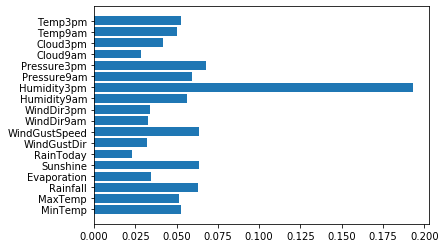

In [8]:
import matplotlib.pyplot as plt

clf.feature_importances_
plt.barh(features, clf.feature_importances_)

## Model Performance Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(),
        {
            'n_estimators':[50,100,150],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,3]
        })
clf.fit(X_train, y_train)
clf.cv_results_

df_res = pd.DataFrame(clf.cv_results_)

In [23]:
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.219174,0.257821,0.270321,0.006107,gini,2,50,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.850897,0.854309,0.846227,0.851842,0.850680,0.850791,0.002621,12
1,21.829949,1.444031,0.542062,0.013097,gini,2,100,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.852734,0.854939,0.850163,0.853154,0.850890,0.852376,0.001698,8
2,31.733026,0.978039,0.830095,0.030354,gini,2,150,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.853049,0.856723,0.850005,0.854466,0.853566,0.853562,0.002178,1
3,10.328320,0.315524,0.268628,0.004850,gini,3,50,"{'criterion': 'gini', 'min_samples_split': 3, ...",0.850320,0.855201,0.848273,0.853102,0.851834,0.851746,0.002361,9
4,21.246545,0.691077,0.544112,0.024152,gini,3,100,"{'criterion': 'gini', 'min_samples_split': 3, ...",0.853889,0.856461,0.848851,0.854834,0.852779,0.853363,0.002559,5
5,30.678469,0.809889,0.812321,0.038521,gini,3,150,"{'criterion': 'gini', 'min_samples_split': 3, ...",0.853154,0.856671,0.850058,0.854676,0.852937,0.853499,0.002178,2
6,12.695032,1.266458,0.272957,0.024296,entropy,2,50,"{'criterion': 'entropy', 'min_samples_split': ...",0.851527,0.854256,0.848273,0.853417,0.851257,0.851746,0.002071,10
7,24.822828,0.994213,0.525245,0.027343,entropy,2,100,"{'criterion': 'entropy', 'min_samples_split': ...",0.850478,0.855201,0.849743,0.856041,0.852569,0.852806,0.002492,7
8,37.638006,2.144257,0.849069,0.157764,entropy,2,150,"{'criterion': 'entropy', 'min_samples_split': ...",0.853364,0.856251,0.849953,0.853417,0.852412,0.853079,0.002024,6
9,11.833166,0.029930,0.254497,0.001348,entropy,3,50,"{'criterion': 'entropy', 'min_samples_split': ...",0.851580,0.854204,0.846541,0.853679,0.850942,0.851389,0.002717,11


In [24]:
from sklearn import metrics  

clf = RandomForestClassifier(random_state = 1, n_estimators = 150, criterion = 'gini', min_samples_split = 2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  85.75142784076378


## Evaluation

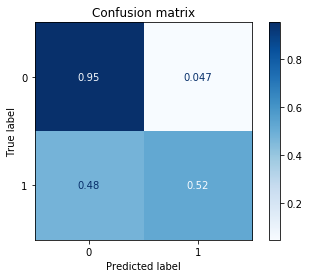

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix')
plt.show(matrix)
plt.show()

In [27]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average=None)

array([0.91234694, 0.619465  ])